STEP 1: IMPORTING THE NECCESSARY LIBRARIES AND TOOLS

In [32]:
import pdfplumber
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

STEP 2: LOADING THE DATA TO DRAW INSIGHT. THIS IS QUITE DIFFERENT FROM THE .CSV FILES SO IT INVOLVES A DIFFERENT APPROACH, WHICH I'LL MAKE USE OF THE PDFPLUMBER LIBRARY

In [33]:
import pdfplumber
import pandas as pd

# Open the PDF and extract text
with pdfplumber.open('Churn_Prediction_Dataset_Sample.pdf') as pdf:
    pages = pdf.pages
    data = []
    for page in pages:
        tables = page.extract_tables()
        for table in tables:
            data.extend(table)

# Convert extracted data to a DataFrame
data = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row is the header


In [34]:
data.head(5)

,CustomerID,SignupDate,Age,TenureMontUhss,agePatternScPo,areymentHistoEr,nygagementLev,elChurnLabel
0,1,1986-07-07,33,3,0.2009,Fair,High,0
1,2,1986-07-08,20,41,0.2969,Good,Medium,0
2,3,1986-07-09,62,17,0.0587,Good,Low,0
3,4,1986-07-10,37,3,0.8604,Good,Medium,1
4,5,1986-07-11,33,7,0.9312,Good,High,0


In [35]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       10 non-null     object
 1   SignupDate       10 non-null     object
 2   Age              10 non-null     object
 3   TenureMontUhss   10 non-null     object
 4   agePatternScPo   10 non-null     object
 5   areymentHistoEr  10 non-null     object
 6   nygagementLev    10 non-null     object
 7   elChurnLabel     10 non-null     object
dtypes: object(8)
memory usage: 768.0+ bytes


,CustomerID,SignupDate,Age,TenureMontUhss,agePatternScPo,areymentHistoEr,nygagementLev,elChurnLabel
count,10,10,10,10,10,10,10,10
unique,10,10,9,9,10,3,3,2
top,1,1986-07-07,33,3,0.2009,Good,High,0
freq,1,1,2,2,1,5,4,6


STEP 3: THE DATA PREPROCESSING STAGE; WHICH ENTAILS RENAMING THE COLUMNS DUE TO MISPELT WORDS, CONVERT DATATYPES, HANDLING MISSING VALUES, REMOVING OUTLIERS AND CONVERTING CATEGORICAL VALUES TO NUMERIC VALUES

In [36]:
data.rename(columns={
    "CustomerID": "CustomerID",
    "SignupDate": "SignupDate",
    "Age": "Age",
    "TenureMontUhss": "TenureMonths",
    "agePatternScPo": "UsagePatternScore",   
    "areymentHistoEr": "PaymentHistory",
    "nygagementLev": "EngagementLevel",     
    "elChurnLabel": "ChurnLabel" 
}, inplace=True)


In [37]:
# Convert necessary columns to numeric (use the appropriate column names)
data['Age'] = pd.to_numeric(data['Age'], errors="coerce")
# Convert 'TenureMonths' to numeric by stripping non-numeric characters
data['TenureMonths'] = data['TenureMonths'].str.extract('(\d+)').astype(int)


data['SignupDate'] = pd.to_datetime(data['SignupDate'], errors="coerce")
print(data.dtypes)

CustomerID                   object
SignupDate           datetime64[ns]
Age                           int64
TenureMonths                  int32
UsagePatternScore            object
PaymentHistory               object
EngagementLevel              object
ChurnLabel                   object
dtype: object


In [38]:
data.columns
data.drop(columns='CustomerID', inplace=True)

In [39]:
le = LabelEncoder()
data['PaymentHistory'] = le.fit_transform(data['PaymentHistory'])
data['EngagementLevel'] = le.fit_transform(data['EngagementLevel'])
data['UsagePatternScore'] = le.fit_transform(data['UsagePatternScore'])
data['ChurnLabel'] = le.fit_transform(data['ChurnLabel'])

In [40]:
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SignupDate         10 non-null     datetime64[ns]
 1   Age                10 non-null     int64         
 2   TenureMonths       10 non-null     int32         
 3   UsagePatternScore  10 non-null     int32         
 4   PaymentHistory     10 non-null     int32         
 5   EngagementLevel    10 non-null     int32         
 6   ChurnLabel         10 non-null     int32         
dtypes: datetime64[ns](1), int32(5), int64(1)
memory usage: 488.0 bytes


In [41]:
# Convert all integer columns to int64
data = data.astype({'TenureMonths': 'int64', 'ChurnLabel': 'int64'})


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SignupDate         10 non-null     datetime64[ns]
 1   Age                10 non-null     int64         
 2   TenureMonths       10 non-null     int64         
 3   UsagePatternScore  10 non-null     int32         
 4   PaymentHistory     10 non-null     int32         
 5   EngagementLevel    10 non-null     int32         
 6   ChurnLabel         10 non-null     int64         
dtypes: datetime64[ns](1), int32(3), int64(3)
memory usage: 568.0 bytes


PREPARING THE MODEL BY SELECTING THE FEATURES AND TARGET VARIABLES

In [43]:
# Define the feature set (X) by selecting the relevant columns
X = data[['Age', 'TenureMonths', 'UsagePatternScore', 'PaymentHistory', 'EngagementLevel']]

# Define the target variable (y)
y = data['ChurnLabel']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



PREDICTION MAKING

In [44]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'The Accuracy score is: {accuracy}')
print(f'The Precision score is: {precision}')
print(f'The Recall score is: {recall}')
print(f'The F1 Score is: {f1}')

The Accuracy score is: 1.0
The Precision score is: 0.0
The Recall score is: 0.0
The F1 Score is: 0.0


c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


SAVING THE MODEL TO A .PKL FILE

In [46]:
# Save the model to a file
with open('customer_churn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# To load the model later
with open('customer_churn_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

FEATURE IMPORTANCE

             Feature  Importance
2  UsagePatternScore    0.321322
1       TenureMonths    0.203798
0                Age    0.174801
4    EngagementLevel    0.153371
3     PaymentHistory    0.146709


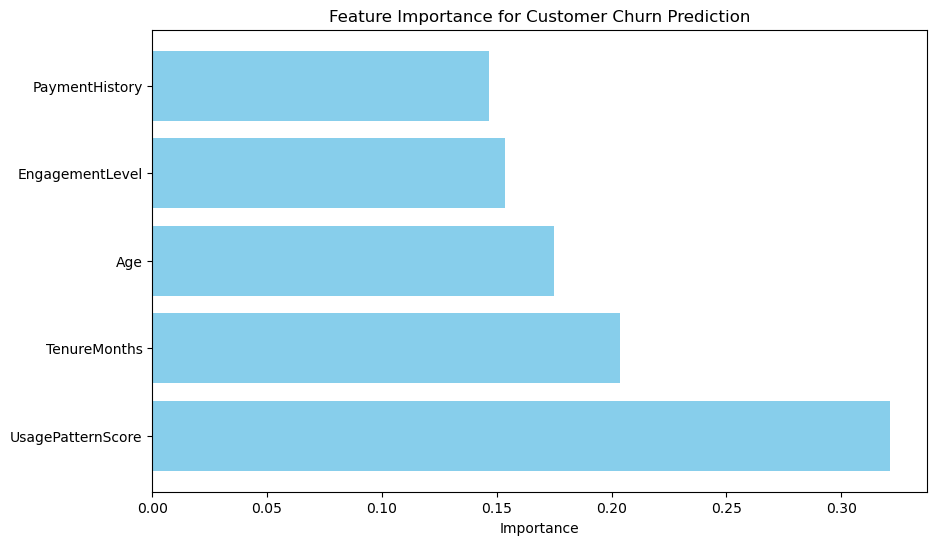

In [47]:

importances = model.feature_importances_
feature_names = X.columns  #  X is the DataFrame of features

# DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Customer Churn Prediction')
plt.show()


MODEL PERFORMANCE SUMMARY

In [48]:
# Create a summary report
performance_summary = {
    'Model': 'Random Forest Classifier',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Limitations': 'Possible class imbalance affecting precision and recall; model complexity may lead to overfitting.'
}

# Print the performance summary
print("Model Performance Summary:")
for key, value in performance_summary.items():
    print(f"{key}: {value}")


Model Performance Summary:
Model: Random Forest Classifier
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Limitations: Possible class imbalance affecting precision and recall; model complexity may lead to overfitting.
